In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,6]
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"C:\Users\RONAK KOTHARI\Desktop\Tier 3 capstone 2 dataset\Covid-19 Detection.csv")

In [3]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Covid-19 Result
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
df.shape

(349, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Covid-19 Result       349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Covid-19 Result'],
      dtype='object')

In [7]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Covid-19 Result         0
dtype: int64

In [8]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Covid-19 Result         object
dtype: object

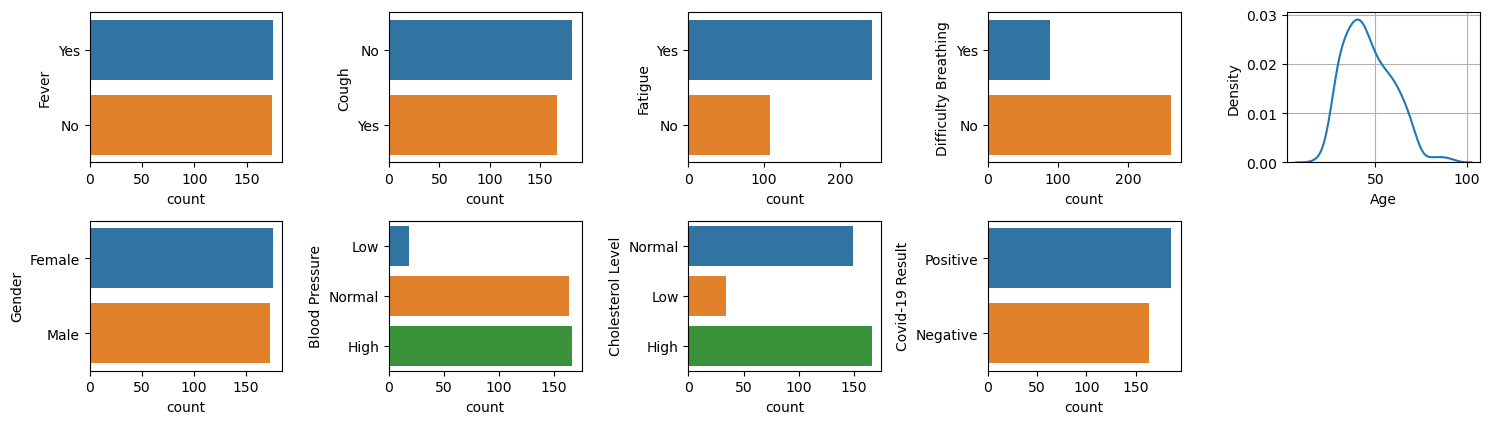

In [9]:
r=3
c=5
it=1
for i in df.drop('Disease',axis=1).columns:
    plt.subplot(r,c,it)
    if df[i].dtype=='object':
        sns.countplot(y=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [10]:
for i in ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']:
    df[i] = df[i].replace({'Yes':1,'No':0})

In [11]:
for i in ['Blood Pressure', 'Cholesterol Level']:
    df[i] = df[i].replace({'Low':1,'Normal':2,'High':3})

In [12]:
df['Covid-19 Result'] = df['Covid-19 Result'].replace({'Positive':1,'Negative':0})
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

In [13]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Covid-19 Result
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
4,Asthma,1,1,0,1,25,1,2,2,1


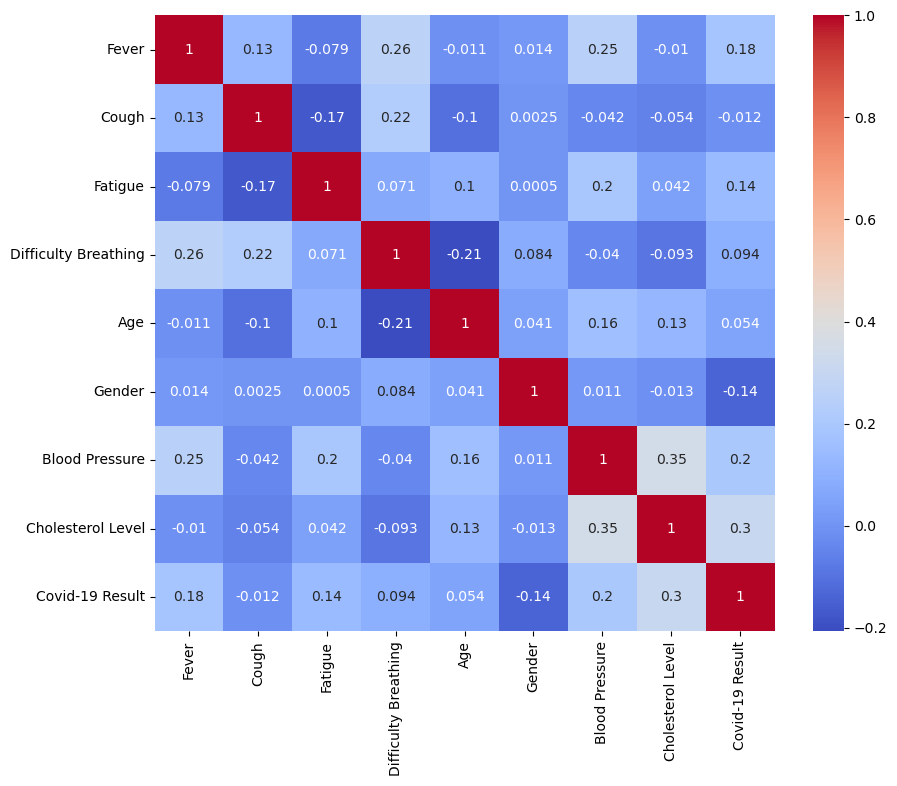

In [14]:
correlation_matrix =df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

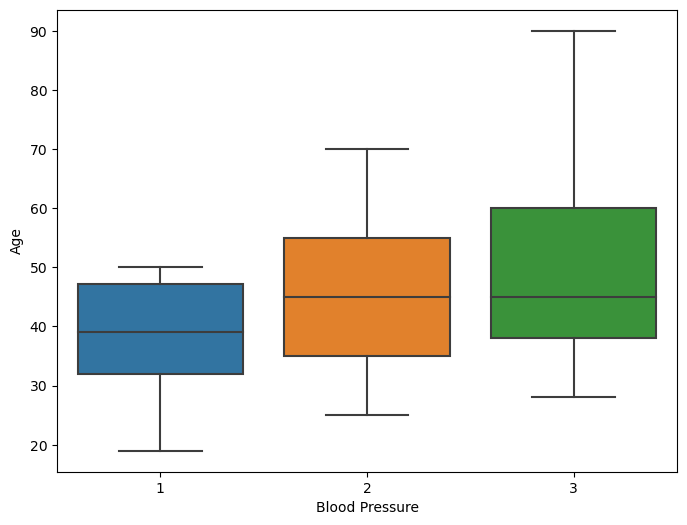

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Blood Pressure', y='Age', data=df)
plt.show()

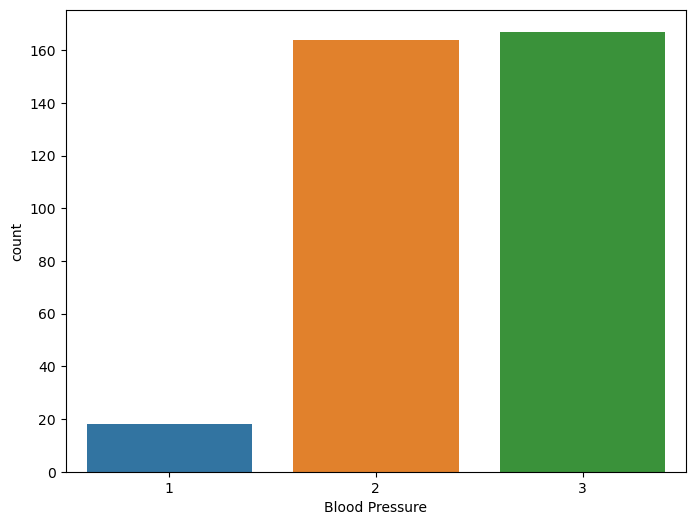

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Pressure', hue=None, data=df)
plt.show()

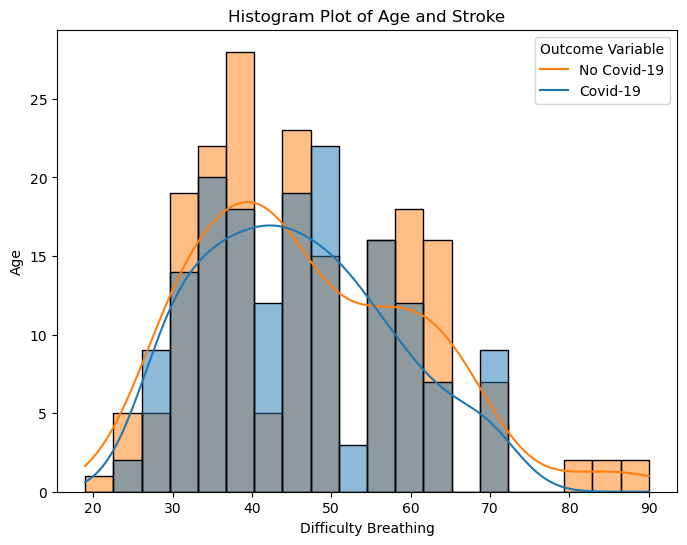

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Covid-19 Result', bins=20, kde=True)
plt.title('Histogram Plot of Age and Difficulty Breathing')
plt.xlabel('Difficulty Breathing')
plt.ylabel('Age')
plt.legend(title='Outcome Variable', labels=['No Covid-19', 'Covid-19'])
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mmax = MinMaxScaler()

In [20]:
df[['Age']] = mmax.fit_transform(df[['Age']])

In [21]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Covid-19 Result
0,Influenza,1,0,1,1,0.000000,0,1,2,1
1,Common Cold,0,1,1,0,0.084507,0,2,2,0
2,Eczema,0,1,1,0,0.084507,0,2,2,0
3,Asthma,1,1,0,1,0.084507,1,2,2,1
4,Asthma,1,1,0,1,0.084507,1,2,2,1


In [22]:
y = df['Covid-19 Result']
x = df[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age','Gender', 'Blood Pressure', 'Cholesterol Level']]

In [23]:
import statsmodels.api as sm

In [24]:
xc = sm.add_constant(x)
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.597186
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Covid-19 Result   No. Observations:                  349
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                            8
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.1357
Time:                        13:33:18   Log-Likelihood:                -208.42
converged:                       True   LL-Null:                       -241.15
Covariance Type:            nonrobust   LLR p-value:                 3.907e-11
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.3948      0.678     -5.005      0.000      -4.724      -2.065

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
lr = LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [30]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(xtrain,ytrain)
    y_pred_train = model_name.predict(xtrain)
    y_pred_test = model_name.predict(xtest)
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))
    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.grid()
    plt.show()
    print("--"*50)
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))
    plt.figure(figsize=(9,4))
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1])
    plt.grid()
    plt.show()


For the LogisticRegression()
The TRAIN accuracy is 0.7336065573770492
The ROC score for TRAIN data is 0.730603302999663


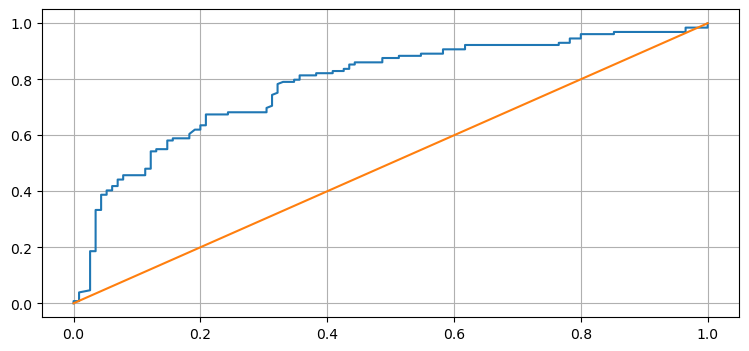

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.5904761904761905
The ROC score for TEST data is 0.5800438596491229


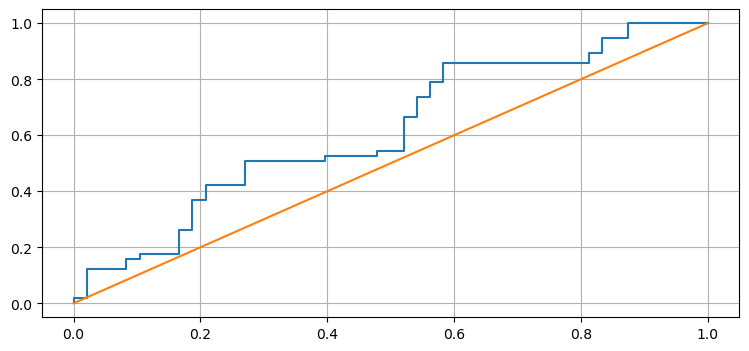

In [35]:
predictor(lr)

For the DecisionTreeClassifier()
The TRAIN accuracy is 0.9795081967213115
The ROC score for TRAIN data is 0.9801482979440513


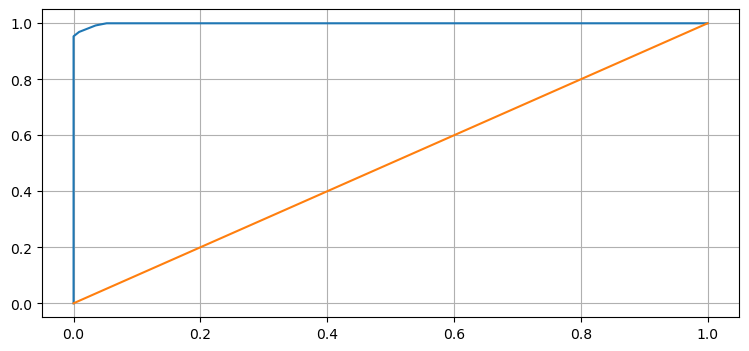

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7047619047619048
The ROC score for TEST data is 0.7083333333333334


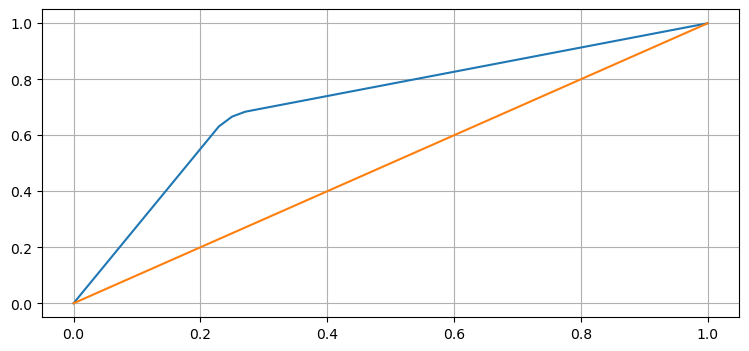

In [32]:
predictor(dt)

For the RandomForestClassifier()
The TRAIN accuracy is 0.9795081967213115
The ROC score for TRAIN data is 0.9796764408493427


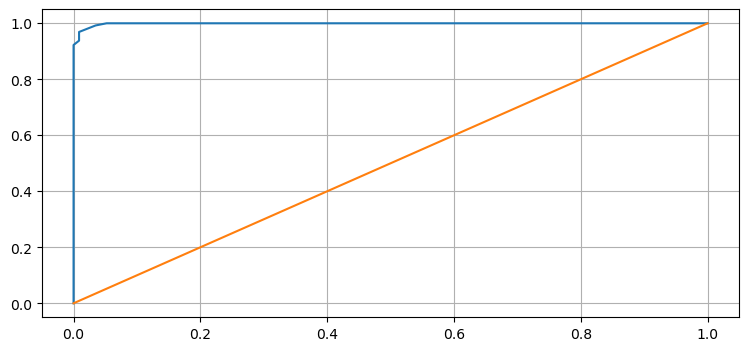

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7333333333333333
The ROC score for TEST data is 0.7297149122807017


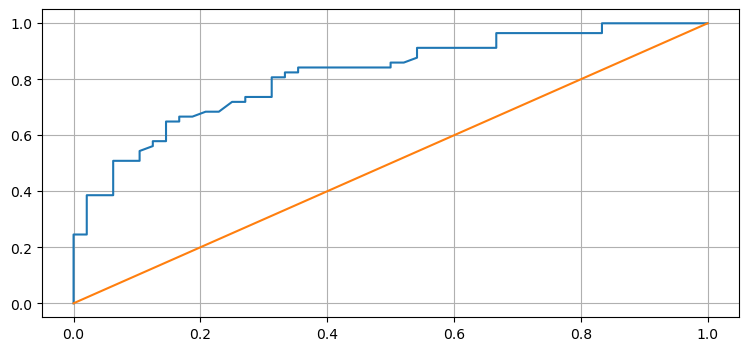

In [33]:
predictor(rf)

For the KNeighborsClassifier()
The TRAIN accuracy is 0.8114754098360656
The ROC score for TRAIN data is 0.8099089989888778


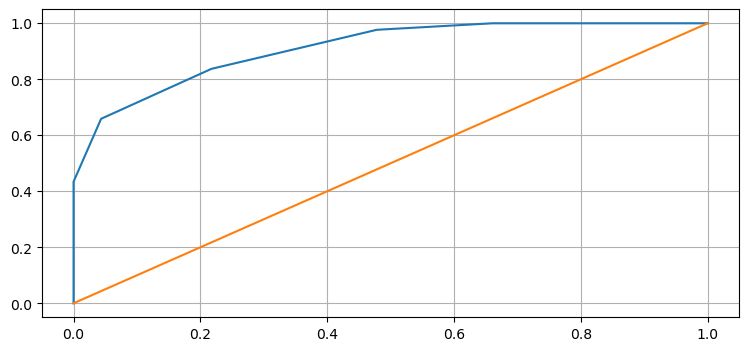

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.6857142857142857
The ROC score for TEST data is 0.6776315789473684


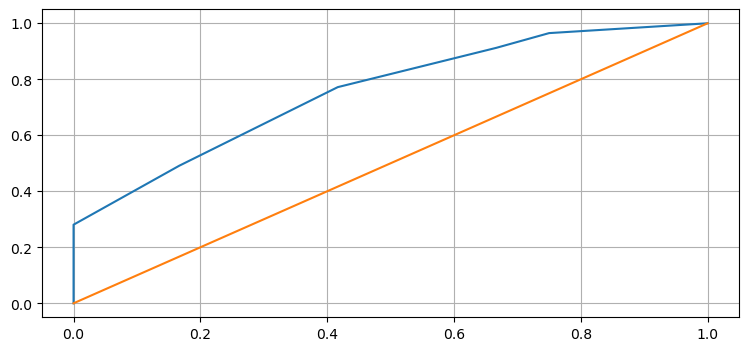

In [34]:
predictor(knn)